<a href="https://colab.research.google.com/github/mannmoshe/deep-learning/blob/main/medicine_imaging_project/medicine_imaging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
import shutil
import pathlib
import imageio
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [3]:
tf.__version__

'2.12.0'

create directories

In [4]:
!mkdir train
!mkdir validation
!mkdir test

create subdirectories for each class

In [5]:
!mkdir train/01
!mkdir train/02
!mkdir train/03

!mkdir validation/01
!mkdir validation/02
!mkdir validation/03

!mkdir test/01
!mkdir test/02
!mkdir test/03

NOTE: For running the model on your computer, please change the pathes below according to the location in your drive.

In [6]:
class1_path = '/content/gdrive/MyDrive/M.sc Data Mining/Medicine imaging/data/01/'
class2_path = '/content/gdrive/MyDrive/M.sc Data Mining/Medicine imaging/data/02/'
class3_path = '/content/gdrive/MyDrive/M.sc Data Mining/Medicine imaging/data/03/'

In [7]:
class1_files = os.listdir(class1_path)
class2_files = os.listdir(class2_path)
class3_files = os.listdir(class3_path)

In [8]:
class1_files_sorted = sorted([x for x in class1_files])
class2_files_sorted = sorted([x for x in class2_files])
class3_files_sorted = sorted([x for x in class3_files])

In [9]:
class1_files_sorted[:5]

['01.jpeg', '010.jpeg', '011.jpeg', '012.jpeg', '013.jpeg']

In [10]:
print(len(class1_files_sorted), len(class2_files_sorted), len(class3_files_sorted))

70 70 111


split class 1 to train, validation and test

In [11]:
for f in class1_files_sorted[:35]:
  src = os.path.join(class1_path, f)
  dst = os.path.join('/content/train/01/', f)
  shutil.copyfile(src, dst)

In [12]:
for f in class1_files_sorted[35:53]:
  src = os.path.join(class1_path, f)
  dst = os.path.join('/content/validation/01/', f)
  shutil.copyfile(src, dst)

In [13]:
for f in class1_files_sorted[53:]:
  src = os.path.join(class1_path, f)
  dst = os.path.join('/content/test/01/', f)
  shutil.copyfile(src, dst)

split class 2 to train, validation and test

In [14]:
for f in class2_files_sorted[:35]:
  src = os.path.join(class2_path, f)
  dst = os.path.join('/content/train/02/', f)
  shutil.copyfile(src, dst)

In [15]:
for f in class2_files_sorted[35:53]:
  src = os.path.join(class2_path, f)
  dst = os.path.join('/content/validation/02/', f)
  shutil.copyfile(src, dst)

In [16]:
for f in class2_files_sorted[53:]:
  src = os.path.join(class2_path, f)
  dst = os.path.join('/content/test/02/', f)
  shutil.copyfile(src, dst)

split class 3 to train, validation and test

In [17]:
for f in class3_files_sorted[:35]:
  src = os.path.join(class3_path, f)
  dst = os.path.join('/content/train/03/', f)
  shutil.copyfile(src, dst)

In [18]:
for f in class3_files_sorted[35:53]:
  src = os.path.join(class3_path, f)
  dst = os.path.join('/content/validation/03/', f)
  shutil.copyfile(src, dst)

In [19]:
for f in class3_files_sorted[53:70]:
  src = os.path.join(class3_path, f)
  dst = os.path.join('/content/test/03/', f)
  shutil.copyfile(src, dst)

In [20]:
print(len(os.listdir('/content/train/01/')), len(os.listdir('/content/train/02/')), len(os.listdir('/content/train/03/')))

35 35 35


In [21]:
print(len(os.listdir('/content/validation/01/')), len(os.listdir('/content/validation/02/')), len(os.listdir('/content/validation/03/')))

18 18 18


In [22]:
print(len(os.listdir('/content/test/01/')), len(os.listdir('/content/test/02/')), len(os.listdir('/content/test/03/')))

17 17 17


MODEL 1: Build network

In [23]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [25]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [26]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        '/content/train/',
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=10,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        '/content/validation/',
        target_size=(150, 150),
        batch_size=10,
        class_mode='categorical')

Found 105 images belonging to 3 classes.
Found 54 images belonging to 3 classes.


In [27]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (10, 150, 150, 3)
labels batch shape: (10, 3)


In [28]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=5)

<ipython-input-28-2883d3b95d37>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
10/10 [==============================] - 21s 2s/step - loss: 1.1002 - acc: 0.4000 - val_loss: 1.0524 - val_acc: 0.3200
Epoch 2/30
10/10 [==============================] - 18s 2s/step - loss: 1.0016 - acc: 0.5158 - val_loss: 0.9328 - val_acc: 0.8200
Epoch 3/30
10/10 [==============================] - 17s 2s/step - loss: 0.8622 - acc: 0.6316 - val_loss: 1.0671 - val_acc: 0.3400
Epoch 4/30
10/10 [==============================] - 20s 2s/step - loss: 0.7721 - acc: 0.7158 - val_loss: 0.6118 - val_acc: 0.9200
Epoch 5/30
10/10 [==============================] - 17s 2s/step - loss: 0.6349 - acc: 0.8105 - val_loss: 0.4993 - val_acc: 0.8800
Epoch 6/30
10/10 [==============================] - 15s 1s/step - loss: 0.5020 - acc: 0.8105 - val_loss: 0.4633 - val_acc: 0.8400
Epoch 7/30
10/10 [==============================] - 17s 2s/step - loss: 0.4700 - acc: 0.8000 - val_loss: 0.4041 - val_acc: 0.8600
Epoch 8/30
10/10 [==============================] - 16s 1s/step - loss: 0.3736 - acc: 0.88

In [29]:
model.save('MODEL_1.h5')

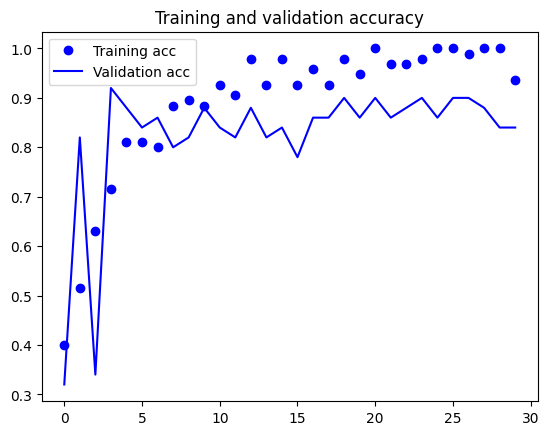

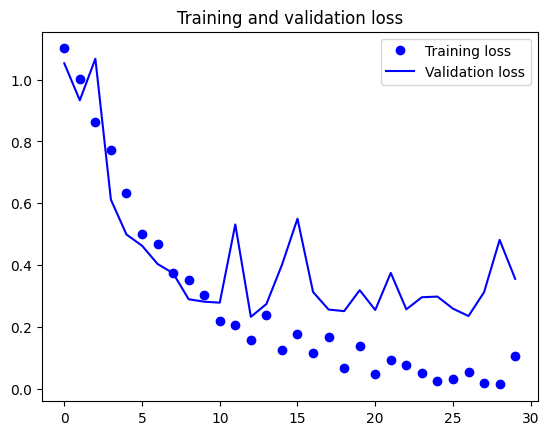

In [30]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

MODEL 2: Data augmentation

In [33]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [34]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        '/content/train/',
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=10,
        # Since we use categorical_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        '/content/validation/',
        target_size=(150, 150),
        batch_size=10,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=5)

Found 105 images belonging to 3 classes.
Found 54 images belonging to 3 classes.


<ipython-input-34-dc5bba310df2>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
10/10 [==============================] - 18s 2s/step - loss: 1.1092 - acc: 0.3474 - val_loss: 1.0727 - val_acc: 0.3400
Epoch 2/30
10/10 [==============================] - 16s 2s/step - loss: 1.0952 - acc: 0.2842 - val_loss: 1.0670 - val_acc: 0.3200
Epoch 3/30
10/10 [==============================] - 21s 2s/step - loss: 1.0726 - acc: 0.3789 - val_loss: 1.0177 - val_acc: 0.3600
Epoch 4/30
10/10 [==============================] - 16s 2s/step - loss: 1.0560 - acc: 0.4200 - val_loss: 0.9958 - val_acc: 0.5000
Epoch 5/30
10/10 [==============================] - 17s 2s/step - loss: 1.0262 - acc: 0.4211 - val_loss: 0.9463 - val_acc: 0.6400
Epoch 6/30
10/10 [==============================] - 15s 1s/step - loss: 1.0130 - acc: 0.4800 - val_loss: 0.8703 - val_acc: 0.7000
Epoch 7/30
10/10 [==============================] - 18s 2s/step - loss: 0.9682 - acc: 0.6000 - val_loss: 0.8265 - val_acc: 0.5600
Epoch 8/30
10/10 [==============================] - 18s 2s/step - loss: 0.9298 - acc: 0.53

In [35]:
model.save('MODEL_2.h5')

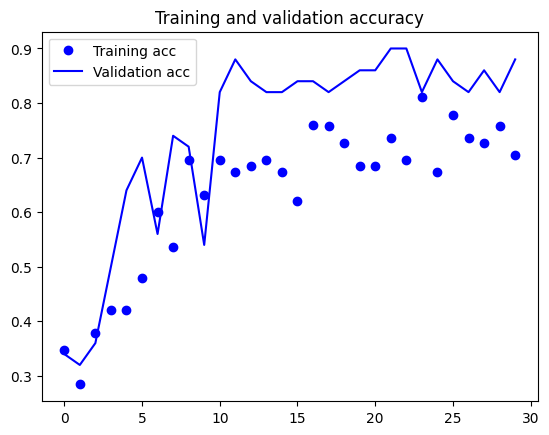

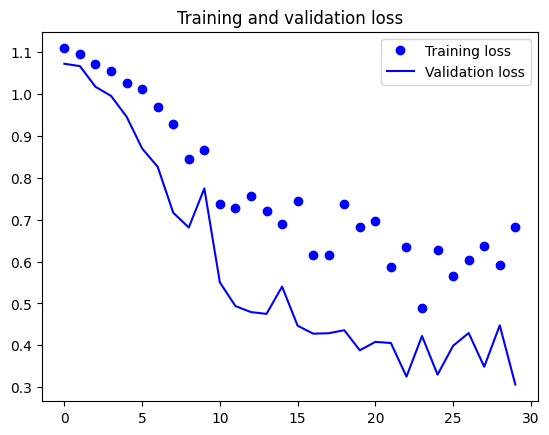

In [36]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

MODEL 3

In [37]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [38]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [42]:
train_dir = '/content/train/'
validation_dir = '/content/validation/'
test_dir = '/content/test/'

datagen = ImageDataGenerator(rescale=1./255)
#batch_size = 10

def extract_features(directory, sample_count, batch_size):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count, 3))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 35, 5)
validation_features, validation_labels = extract_features(validation_dir, 18, 9)
test_features, test_labels = extract_features(test_dir, 17, 17)

Found 105 images belonging to 3 classes.
1/1 [==============================] - 1s 1s/step
Found 54 images belonging to 3 classes.
1/1 [==============================] - 2s 2s/step
Found 51 images belonging to 3 classes.
1/1 [==============================] - 5s 5s/step


In [43]:
train_features = np.reshape(train_features, (35, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (18, 4 * 4 * 512))
test_features = np.reshape(test_features, (17, 4 * 4 * 512))

In [44]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
2/2 [==============================] - 2s 239ms/step - loss: 1.5487 - acc: 0.3143 - val_loss: 1.0540 - val_acc: 0.4444
Epoch 2/30
2/2 [==============================] - 0s 69ms/step - loss: 1.1570 - acc: 0.4571 - val_loss: 0.9207 - val_acc: 0.6667
Epoch 3/30
2/2 [==============================] - 0s 70ms/step - loss: 1.1566 - acc: 0.4571 - val_loss: 0.8617 - val_acc: 0.7778
Epoch 4/30
2/2 [==============================] - 0s 70ms/step - loss: 1.1420 - acc: 0.4571 - val_loss: 0.8477 - val_acc: 0.7778
Epoch 5/30
2/2 [==============================] - 0s 56ms/step - loss: 1.0449 - acc: 0.4000 - val_loss: 0.7983 - val_acc: 0.8333
Epoch 6/30
2/2 [==============================] - 0s 54ms/step - loss: 1.0360 - acc: 0.4857 - val_loss: 0.7798 - val_acc: 0.8333
Epoch 7/30
2/2 [==============================] - 0s 70ms/step - loss: 0.9212 - acc: 0.5143 - val_loss: 0.7516 - val_acc: 0.9444
Epoch 8/30
2/2 [==============================] - 0s 69ms/step - loss: 0.8315 - acc: 0.6857 - va

In [46]:
model.save('MODEL_3.h5')

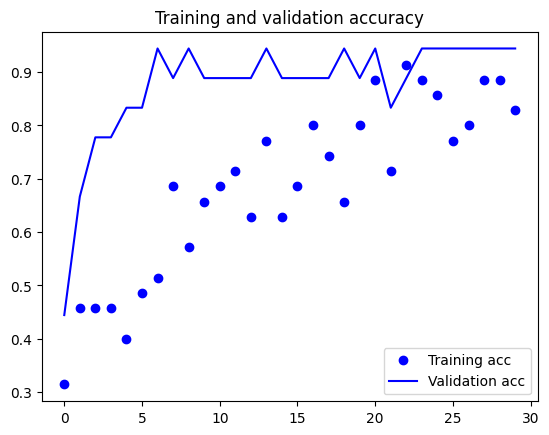

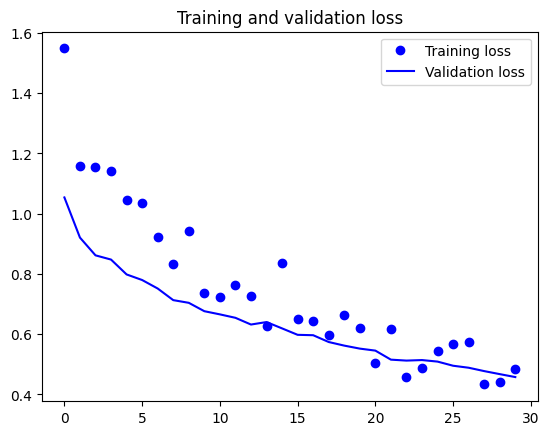

In [45]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()